In [87]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import datetime
from pandas import Series
from datetime import datetime
import requests
from bs4 import BeautifulSoup

In [73]:
# link do wybranej stacji 
txt = r'https://meteomodel.pl/dane/historyczne-dane-pomiarowe/?data={}&rodzaj=st&imgwid=350190566&dni=30&ord=desc'
df_lista=[]

# ramy czasowe
start_month_number = 1
end_month_number = 12
rok_poczatkowy = 1970
rok_koncowy = 2019

for year in range(rok_poczatkowy, rok_koncowy):
        for month in range(start_month_number, end_month_number + 1):
            l = []
            this_month = datetime.date.today().replace(year=year, month=month, day=1)
            data = this_month.strftime("%Y-%m-%d")
            link = txt.format(data)
            r = requests.get(link)

            html_doc = r.text
            soup = BeautifulSoup(html_doc)
            table = soup.find('table')
            table_rows = table.find_all('tr')

            for tr in table_rows:
                td = tr.find_all('td')
                row = [tr.text for tr in td]
                l.append(row)
                
            df = pd.DataFrame(columns=["data", "temp_srednia", "temp_max", "temp_min", "tng", "wilg_rh",
                                       "wil_va", "chmurka", "v_wiatru", "v1", "v2", "cisn_mslp", "cisn_ppp", 
                                       "suma_opadu", "opady_x", "opady_y", "snieg_cm",  "snieg_mm",
                                              "1", "2", "3", "4", "5", "6", "7", "8"], data = l)   

            df = df.iloc[2:]
            df_lista.append(df)

In [134]:
# data cleaning
df_polaczone = pd.concat(df_lista)
df_polaczone = df_polaczone.drop_duplicates(['data'], keep='first')
df_polaczone['year'] = pd.DatetimeIndex(df_polaczone['data']).year
df_polaczone['year_str'] =df_polaczone['year'].astype(str).str[0:3]

df_polaczone = df_polaczone[df_polaczone['year'] >1970]
lista_float = ["temp_srednia", "temp_max", "temp_min", "suma_opadu" ]
df_polaczone[lista_float] = df_polaczone[lista_float].replace('-', 0)
df_polaczone[lista_float] = df_polaczone[lista_float].astype('float64')

display(df_polaczone.head())

,data,temp_srednia,temp_max,temp_min,tng,wilg_rh,wil_va,chmurka,v_wiatru,v1,...,1,2,3,4,5,6,7,8,year,year_str
2,1971-01-01,-8.2,-5.5,-11.4,-12.0,82.5,2.8,5.9,4.1,0.0,...,0.7,-,11.1,-,-,-,-,-,1971,197
2,1971-02-01,4.9,8.3,3.0,0.4,84.3,7.3,6.5,3.3,0.0,...,2.0,7.2,-,-,-,-,-,-,1971,197
3,1971-01-31,4.6,12.6,-0.3,-3.3,81.9,6.9,4.3,4.3,0.0,...,6.6,0.8,-,-,-,-,-,-,1971,197
4,1971-01-30,0.9,4.5,-4.3,-6.5,87.8,5.7,3.0,3.4,0.0,...,4.0,-,-,-,-,-,-,-,1971,197
5,1971-01-29,2.7,4.0,-0.1,-0.7,86.1,6.4,7.0,3.3,0.0,...,0.2,4.3,-,-,-,-,-,-,1971,197


Text(0.5,51,u'Max temperature [\xb0C]')

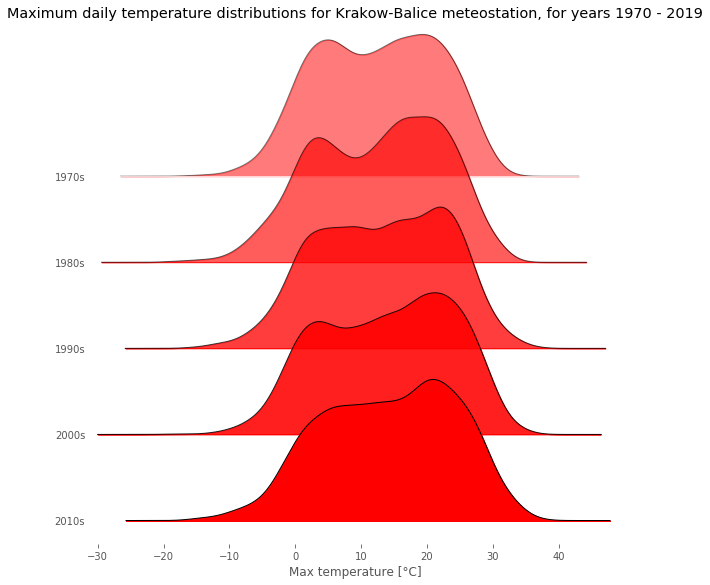

In [157]:
%matplotlib inline
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

labels=['1970s', '1980s','1990s','2000s','2010s']
fig, axes = joypy.joyplot(df_polaczone, by="year_str", column="temp_max", labels=labels, range_style='own', 
                          grid="y", linewidth=1, legend=False, figsize=(10,8), overlap=1.8,  background = 'white',
                          title="Maximum daily temperature distributions for Krakow-Balice meteostation, for years {} - {}".
                          format(rok_poczatkowy, rok_koncowy), fade = True,
                          colormap=cm.autumn)

ax = axes[-1]
ax.set_xlabel("Max temperature " + u"[\u00b0" + "C]")